<h3><b>Introduction to Data Analytics - Exercise set 4, exercise 4</b></h3>

<h4><b>Youtube channel popularity dataset</b></h4>
<img src="http://srv.plab.fi/~tuomasv/data_analytics_2023_images/exercise_set_4/youtube.png" />

<b>Tip:</b> You can just click "Run All" to see the results of this notebook. Some of these exercises have some heavy plots that can take even 1 minute to produce.

<b>Remember:</b> not every dataset has interesting correlations and/or features (too much randomness or variance usually, or not enough data, or data is just self-explanatory). Also, not each correlation implies there's a causation. Finally, not every plot is useful, that's why it's important to try multiple plots in order to "see under the hood". Typically pair plots, joint plots, regression plots, heatmaps and box plots are most useful, but there are some exceptions too.

<h3><b>Quick summary of data:</b></h3>

<p>This dataset contains information on most popular / subscribed YouTube channels. The data includes the channel rank, amount of subscribers, video count, video views, YouTuber/channel name, category and the year the channel started.</p>

<p>Original data: <a href="https://www.kaggle.com/datasets/themrityunjaypathak/most-subscribed-1000-youtube-channels">https://www.kaggle.com/datasets/themrityunjaypathak/most-subscribed-1000-youtube-channels</a></p>

<h3><b>Questions for this exercise:</b></h3>
<b>Answer the questions either as code comments or as markdown. Use separate cells to write your answers.</b><br/><br/>
<li>What features seem to affect the popularity of a YouTube channel?</li>
<li>Can we determine the "formula" on how to be successful in YouTube based on this data? Which columns affect the popularity the most?</li>

<b>Extra questions/tasks for extra points:</b>
<li>What characteristics different YouTube channel categories seem to have on different columns?</li>
<li>Any other ideas about this dataset? Any ways to expand or improve the dataset and the analysis?</li>


<hr />

<b style="color: red;">Place your answers here!</b>

### What features seem to affect the popularity of a YouTube channel?
The factors of popularity of Channel are: subscribers, video views, views Per Subscriber and categories(music, gaming, or education). 

#### Can we determine the "formula" on how to be successful in YouTube based on this data? Which columns affect the popularity the most?
Formula for YouTube Success is to choice most popular categories ike Entertainment, Music, or Film & Animation.

<b>Extra questions/tasks for extra points:<b>


####  What characteristics different YouTube channel categories seem to have on different columns?

<b>I learned from Box Plots:<b>
1. Music Channels have very high subscribers, very high views, low count video and very high views/subscriber.
2. Entertainment Channels have high subscribers, high video views, medium video count and medium views/subscriber.
3. Gaming Channels have high subscribers, high video views, very high video count and medium views/subscribers.


<hr />

<h4><b>Imports and load the original dataset</b></h4>

In [1]:
# import the common data analytics modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

<h4><b>Helper functions for data clean-up</b></h4>

In [2]:
# helper function that takes care of some messed category names 
# that contain a URL instead of an actual category
def fix_category(row):
    category = row['Category']

    if "https" in category:
        return "Other"
    else:
        return category

<h4><b>Data processing</b></h4>

In [3]:
# load the dataset
df = pd.read_csv("youtube.csv")

# clean up the subscribers, video views and video count  -columns
df['Subscribers'] = df['Subscribers'].str.replace(",", "").astype("int64")
df['Video Views'] = df['Video Views'].str.replace(",", "").astype("int64")
df['Video Count'] = df['Video Count'].str.replace(",", "").astype("int64")

df['Category'] = df.apply(fix_category, axis=1)

# remove channels without videos and videos that are marked before YouTube existed (faulty data)
df = df[df['Video Count'] > 0]
df = df[df['Started'] > 2000]

# adding a new column, does average video view per amount of subscribers affect the analysis?
df['views_per_sub'] = df['Video Views'] / df['Subscribers']

# filter out 6 most common categories
categories = list(df['Category'].value_counts().index)
common_categories = categories[0:6]

# filter out only common categories
df2 = df[df['Category'].isin(common_categories)].copy()

# save correlations for further inspecting
correlations = df.corr(numeric_only=True)
correlations2 = df2.corr(numeric_only=True)

<hr>

<b>Extra questions/tasks for extra points:<b>

#### Any other ideas about this dataset? Any ways to expand or improve the dataset and the analysis?

In [46]:
df.head(10)

,Rank,Youtube Channel,Subscribers,Video Views,Video Count,Category,Started,views_per_sub
0,1,T-Series,234000000,212900271553,18515,Music,2006,909.830220
2,3,Cocomelon - Nursery Rhymes,152000000,149084178448,846,Education,2006,980.816963
3,4,SET India,150000000,137828094104,103200,Shows,2006,918.853961
4,5,MrBeast,128000000,21549128785,733,Entertainment,2012,168.352569
6,7,PewDiePie,111000000,28851883250,4694,Gaming,2010,259.926876
7,8,✿ Kids Diana Show,106000000,86638570921,1056,People & Blogs,2015,817.345009
8,9,Like Nastya,104000000,87202935675,754,People & Blogs,2016,838.489766
10,11,WWE,92800000,73577695222,66174,Sports,2007,792.863095
11,12,Vlad and Niki,92700000,72444118381,520,Entertainment,2018,781.489950
12,13,Zee Music Company,91600000,53352597784,7530,Music,2014,582.451941


In [72]:
categories = df.groupby(["Category",'Youtube Channel', 'Video Count']).agg({'views_per_sub': 'max'}).sort_values(by='views_per_sub', ascending=False)
categories.reset_index().head(10)


,Category,Youtube Channel,Video Count,views_per_sub
0,Music,netd müzik,21930,2271.776648
1,Entertainment,Ryan's World,2294,1568.605699
2,Music,jbalvinVEVO,235,1520.278815
3,Entertainment,Tsuriki Show,2158,1464.385482
4,People & Blogs,LeoNata Family,1767,1390.959210
5,Music,Maroon5VEVO,143,1341.504007
6,Comedy,LankyBox,6984,1341.488515
7,Music,MalumaVEVO,177,1307.568523
8,Music,Mundo Bita,195,1300.080773
9,Music,shakiraVEVO,191,1287.455794


Music and Entertainment have most active subscribers.jibalvib VEVO is the third top channel based views/subscribers with 253 videos.

<hr>

<h4><b>seaborn plots - pair plots</b></h4>

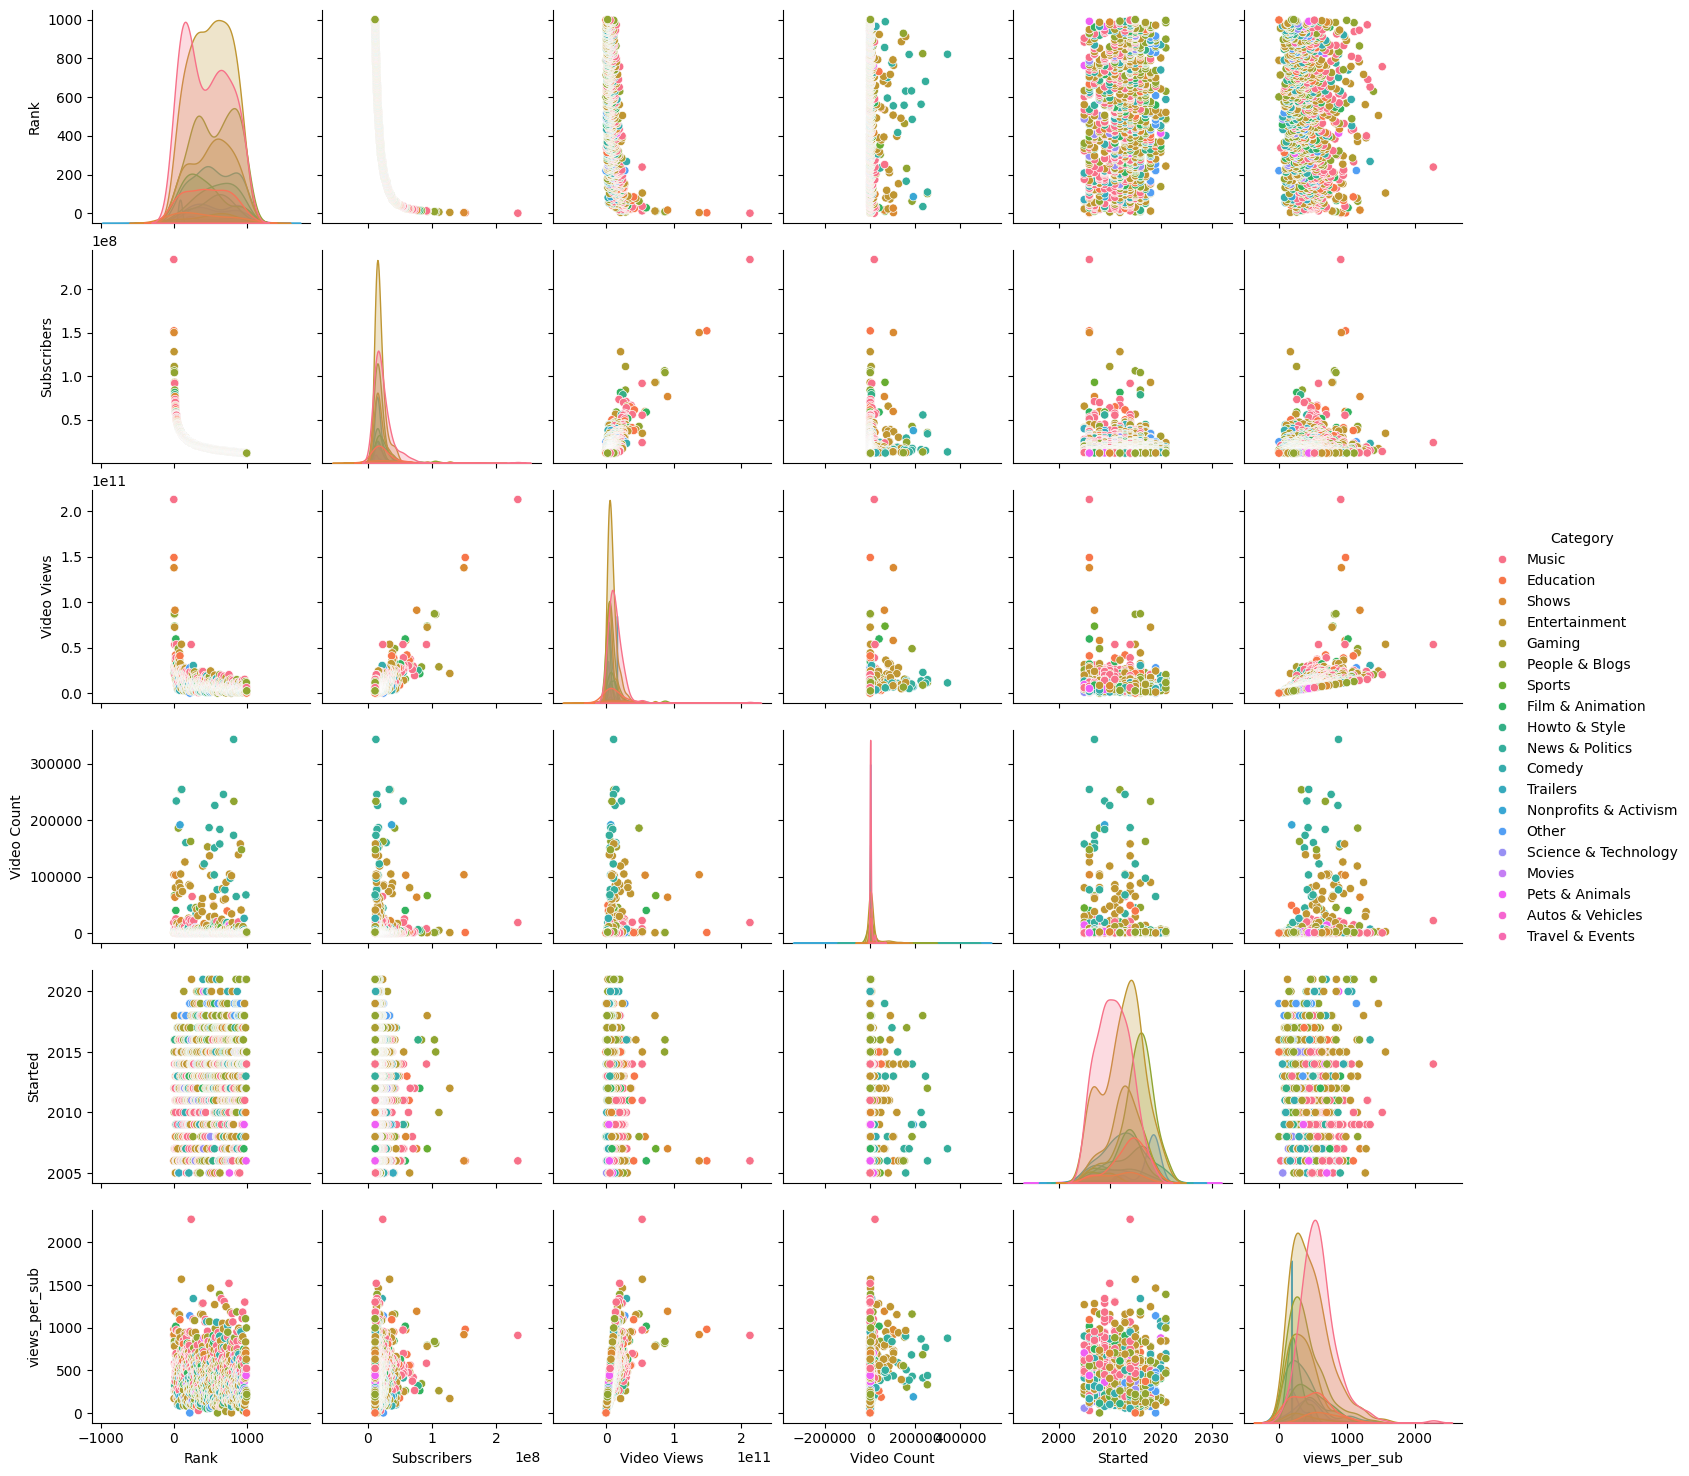

In [4]:
# pairplot, hue on category, original dataset
sns.pairplot(df, hue='Category')

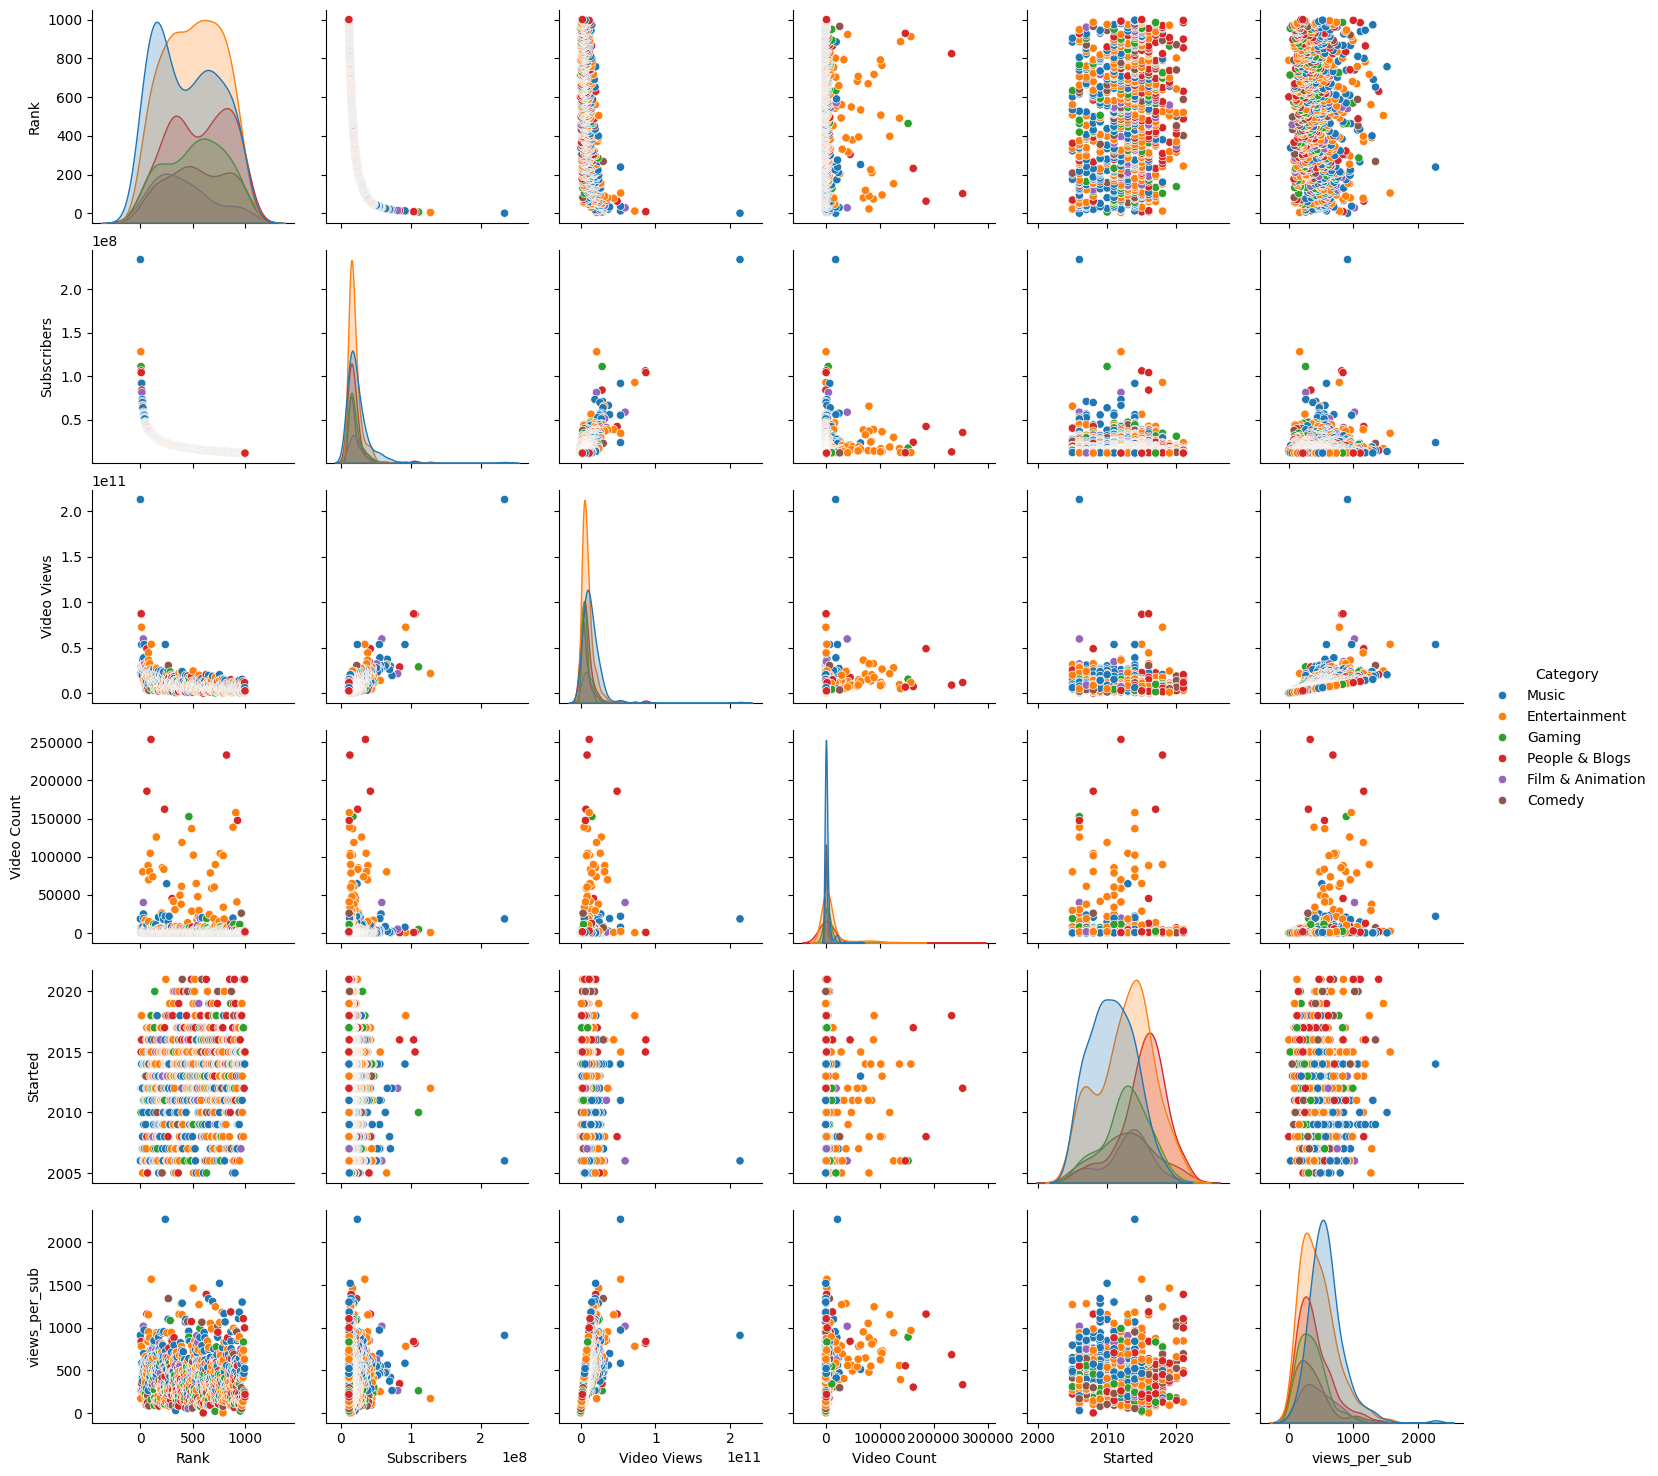

In [5]:
# pairplot, hue on category, filtered dataset (most common categories only)
sns.pairplot(df2, hue='Category')

<h4><b>seaborn plots - linear regression plots</b></h4>

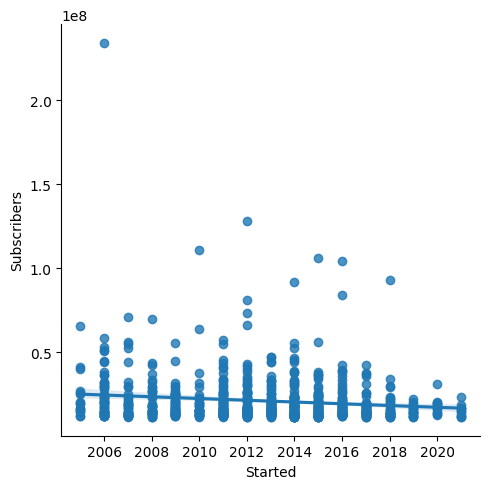

In [6]:
# linear regression plot, Start year and Subscribers
sns.lmplot(x='Started', y='Subscribers', data=df2)

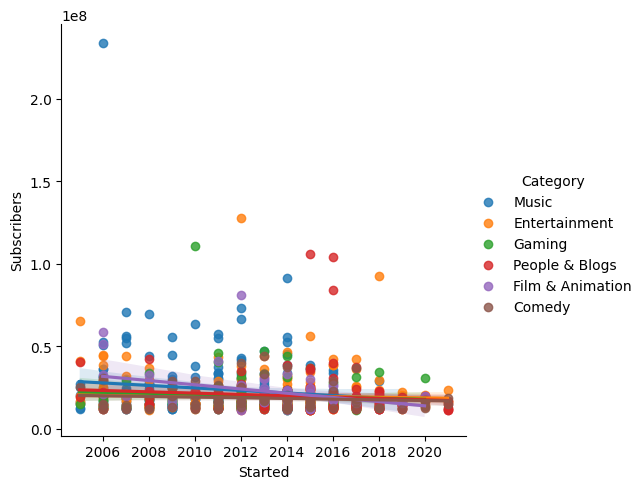

In [7]:
# linear regression plot, Start year and Subscribers, hue on category
sns.lmplot(x='Started', y='Subscribers', data=df2, hue="Category")

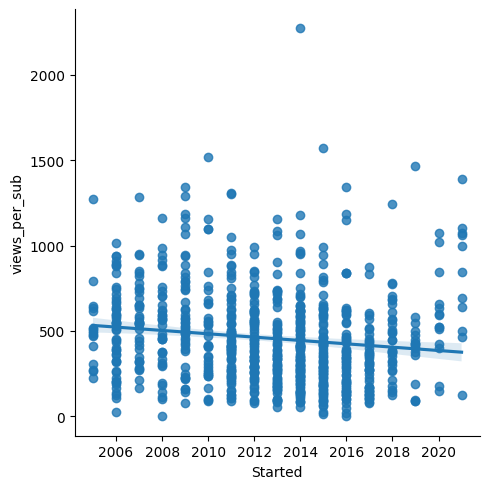

In [8]:
# linear regression plot, Start year and views per subscriber
sns.lmplot(x='Started', y='views_per_sub', data=df2)

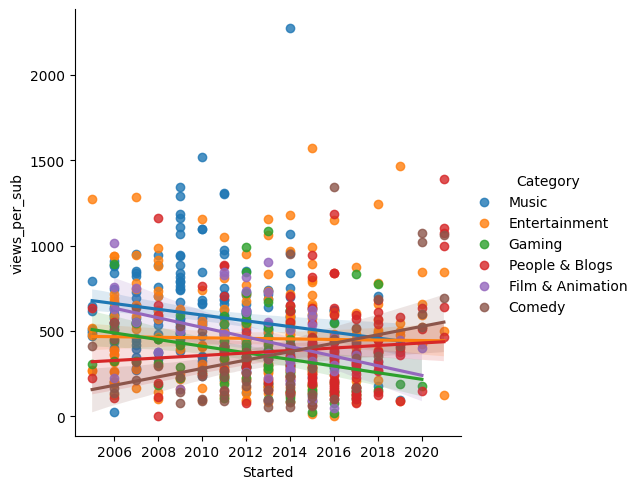

In [9]:
# linear regression plot, Start year and views per subscriber, hue on category
sns.lmplot(x='Started', y='views_per_sub', data=df2, hue="Category")

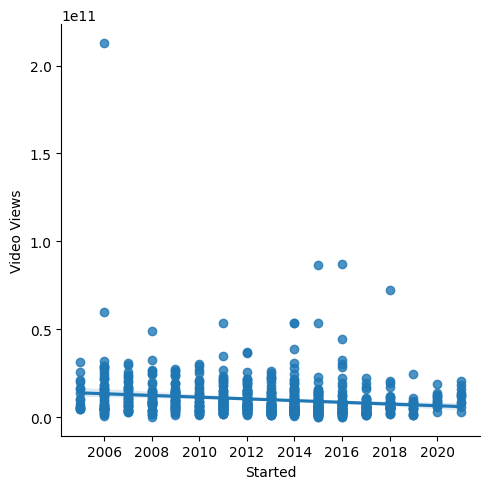

In [10]:
# linear regression plot, Start year and video view count
sns.lmplot(x='Started', y='Video Views', data=df2)

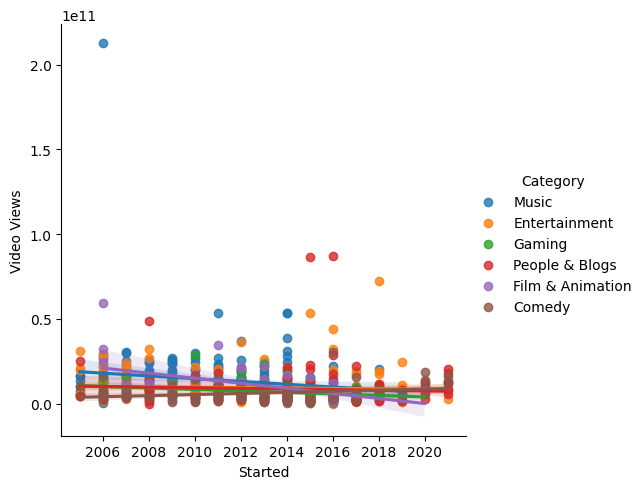

In [11]:
# linear regression plot, Start year and video view count, hue on category
sns.lmplot(x='Started', y='Video Views', data=df2, hue="Category")

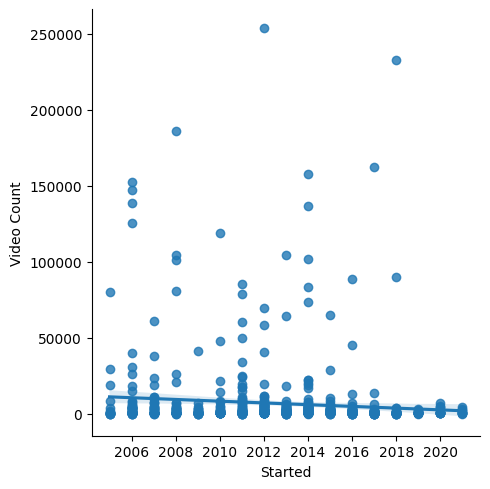

In [12]:
# linear regression plot, Start year and video count
sns.lmplot(x='Started', y='Video Count', data=df2)

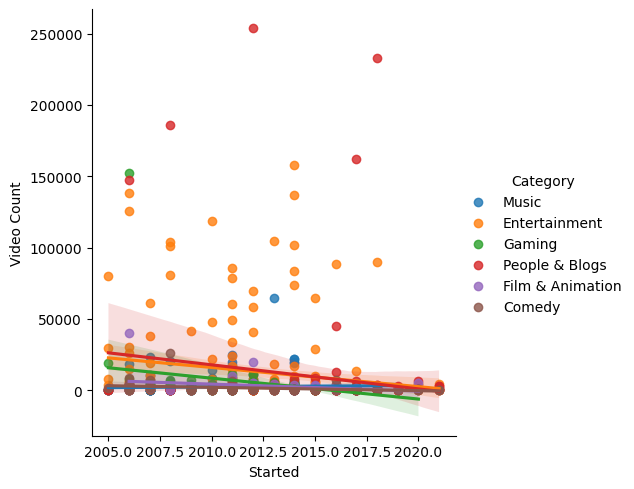

In [13]:
# linear regression plot, Start year and video count, hue on category
sns.lmplot(x='Started', y='Video Count', data=df2, hue="Category")

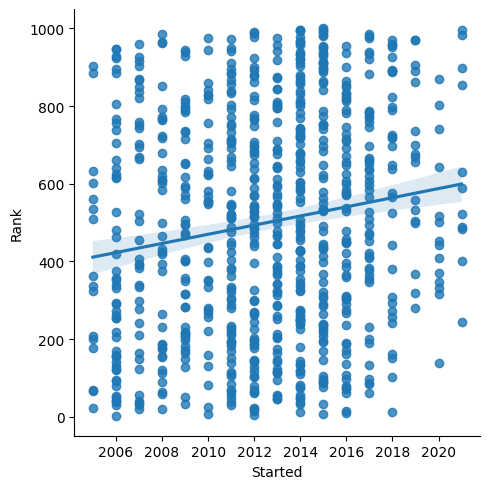

In [14]:
# linear regression plot, Start year and rank
sns.lmplot(x='Started', y='Rank', data=df2)

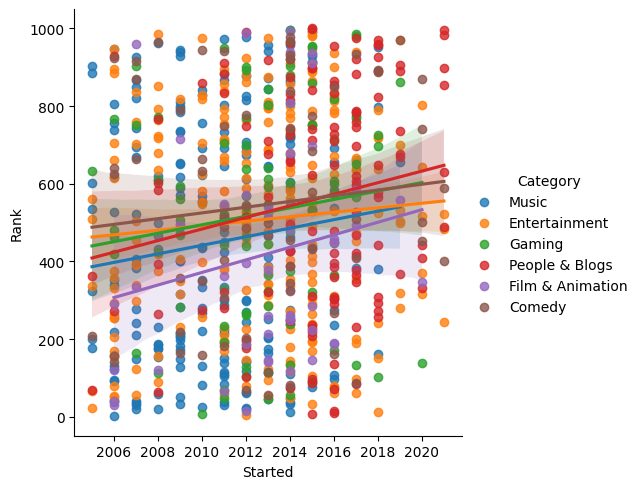

In [15]:
# linear regression plot, Start year and rank, hue on category
sns.lmplot(x='Started', y='Rank', data=df2, hue="Category")

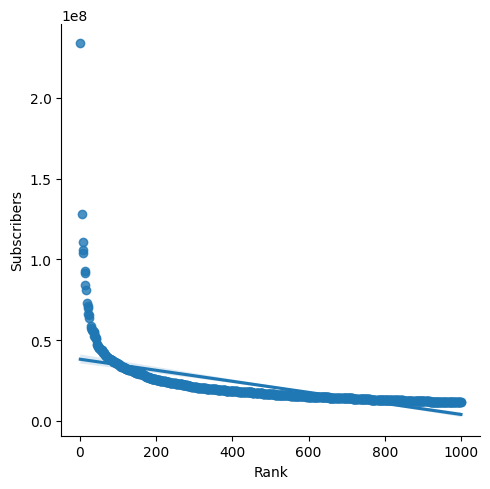

In [16]:
# linear regression plot, Rank and subscribers
sns.lmplot(x='Rank', y='Subscribers', data=df2)

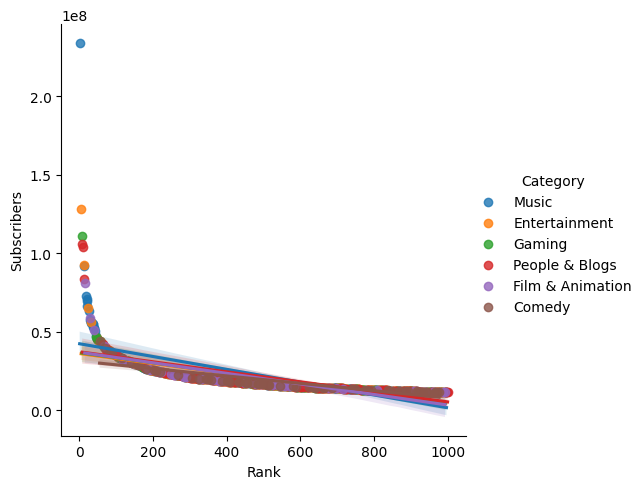

In [17]:
# linear regression plot, Rank and subscribers, hue on category
sns.lmplot(x='Rank', y='Subscribers', data=df2, hue="Category")

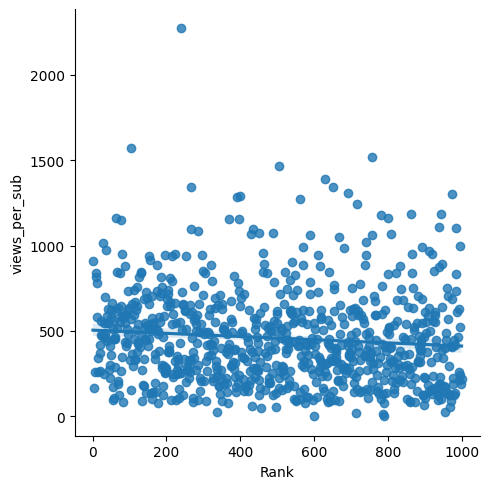

In [18]:
# linear regression plot, Rank and views per subscribers
sns.lmplot(x='Rank', y='views_per_sub', data=df2)

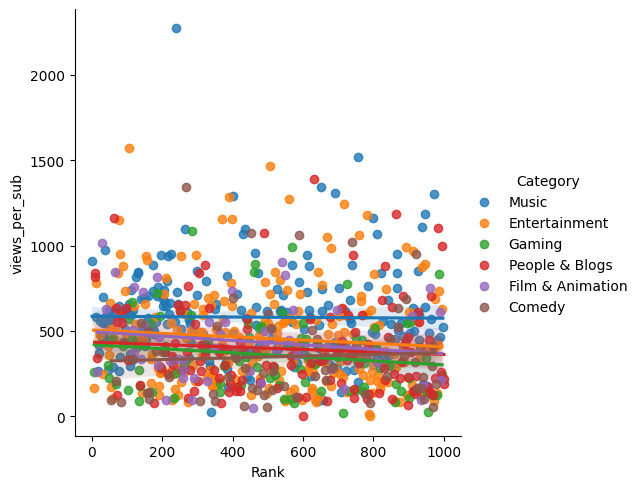

In [19]:
# linear regression plot, Rank and views per subscribers, hue on category
sns.lmplot(x='Rank', y='views_per_sub', data=df2, hue="Category")

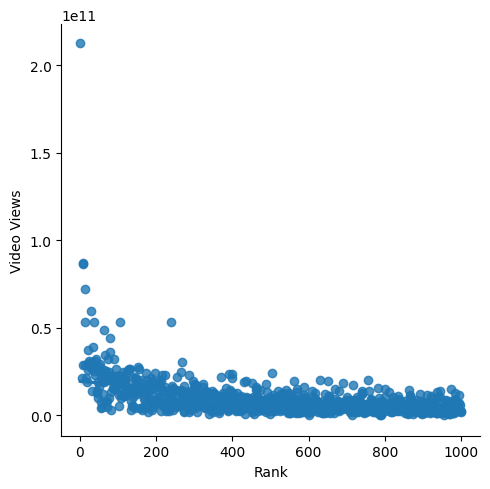

In [20]:
# linear regression plot, Rank and video view count
sns.lmplot(x='Rank', y='Video Views', data=df2)

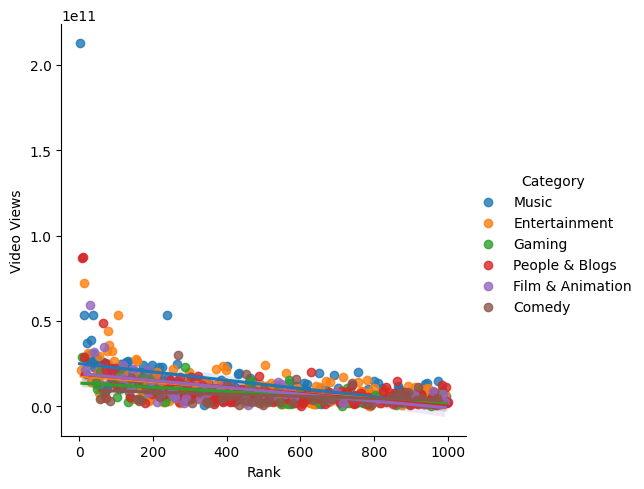

In [21]:
# linear regression plot, Rank and video view count, hue on category
sns.lmplot(x='Rank', y='Video Views', data=df2, hue="Category")

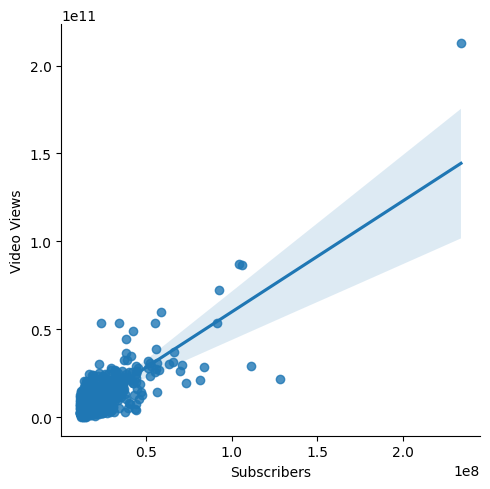

In [22]:
# linear regression plot, Rank and video view count, hue on category
sns.lmplot(x='Subscribers', y='Video Views', data=df2)

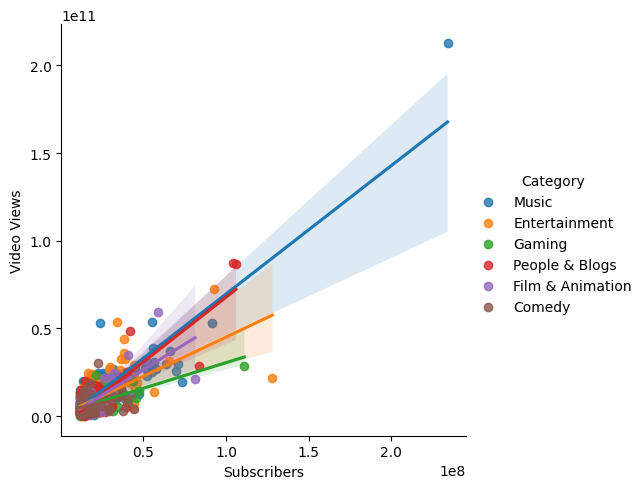

In [23]:
# linear regression plot, Rank and video view count, hue on category
sns.lmplot(x='Subscribers', y='Video Views', data=df2, hue="Category")

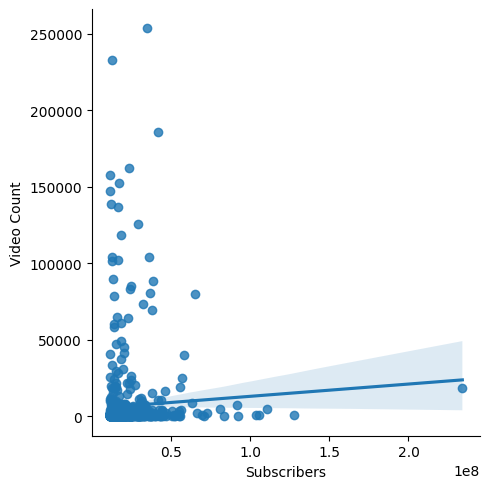

In [24]:
# linear regression plot, Rank and video count, hue on category
sns.lmplot(x='Subscribers', y='Video Count', data=df2)

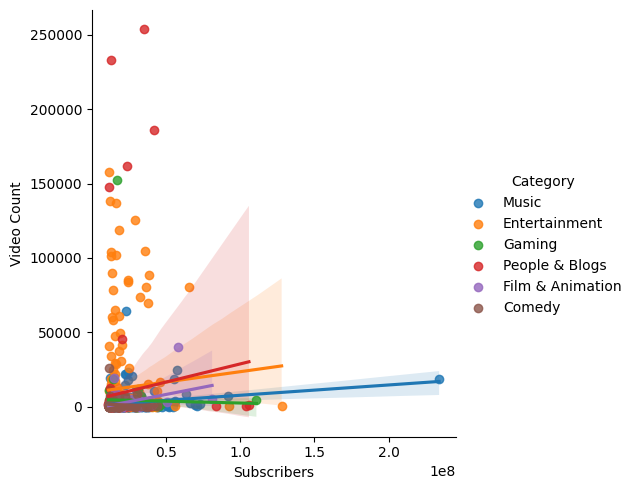

In [25]:
# linear regression plot, Rank and video count, hue on category
sns.lmplot(x='Subscribers', y='Video Count', data=df2, hue="Category")

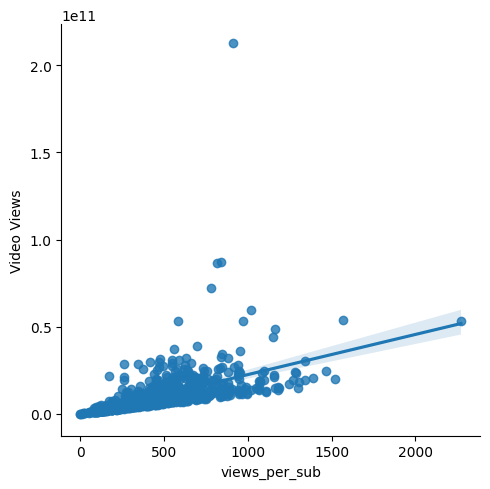

In [26]:
# linear regression plot, views per subscribers and video views
sns.lmplot(x='views_per_sub', y='Video Views', data=df2)

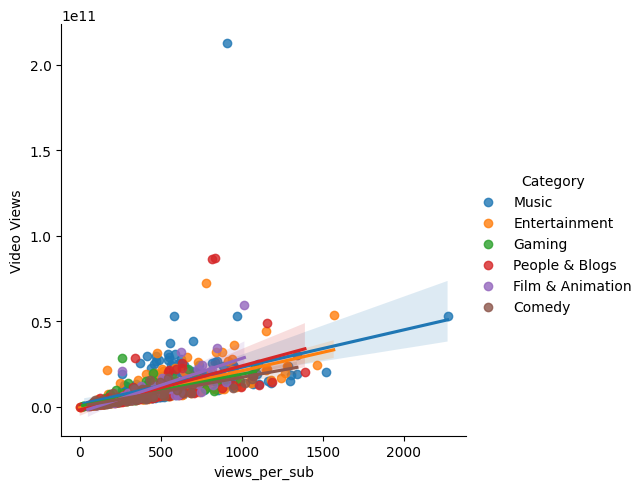

In [27]:
# linear regression plot, views per subscribers and video views, hue on category
sns.lmplot(x='views_per_sub', y='Video Views', data=df2, hue="Category")

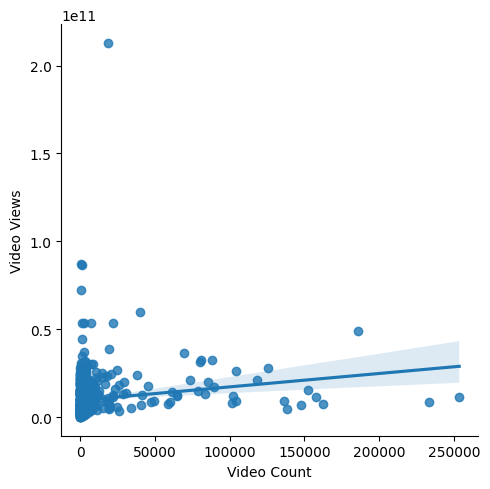

In [28]:
# linear regression plot, video count and video views
sns.lmplot(x='Video Count', y='Video Views', data=df2)

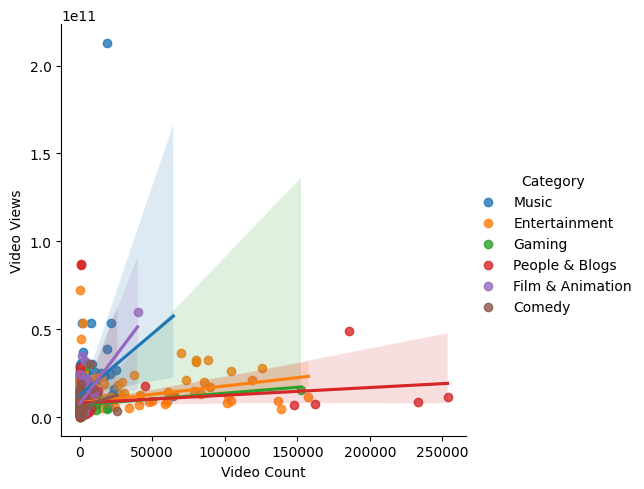

In [29]:
# linear regression plot, video count and video views, hue on category
sns.lmplot(x='Video Count', y='Video Views', data=df2, hue="Category")

<h4><b>seaborn plots - box plots</b></h4>

In [30]:
# helper function that combines years to make it easier to use box plot
# data is between 2005 and 2021
def combine_years(row):
    year = int(row['Started'])

    if 2005 <= year < 2009:
        return 2005.2009
    elif 2009 <= year < 2013:
        return 2009.2013
    elif 2013 <= year < 2017:
        return 2013.2017
    else:
        return 2017.2021
    
    
# create column    
df2['year_span'] = df2.apply(combine_years, axis=1)

<Axes: xlabel='Category', ylabel='Rank'>

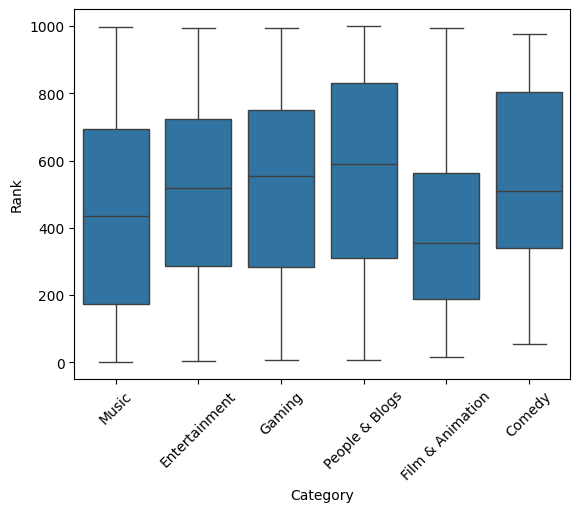

In [31]:
# box plot on category and rank, tilt bottom labels by 45 degrees
plt.xticks(rotation=45)
sns.boxplot(x='Category', y='Rank', data=df2)

<Axes: xlabel='Category', ylabel='Subscribers'>

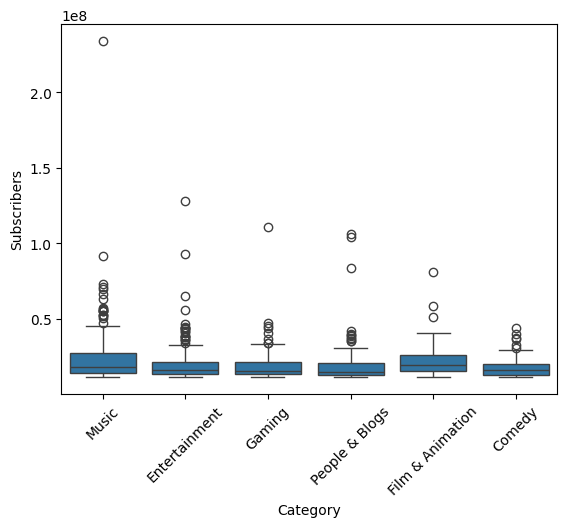

In [32]:
# box plot on category and subscribers, tilt bottom labels by 45 degrees
plt.xticks(rotation=45)
sns.boxplot(x='Category', y='Subscribers', data=df2)

<Axes: xlabel='Category', ylabel='views_per_sub'>

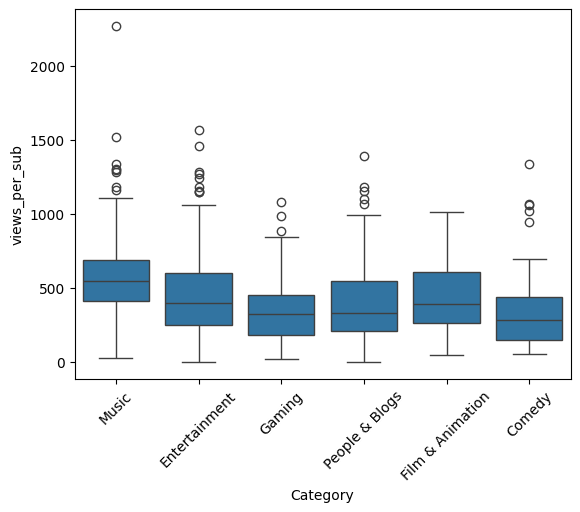

In [33]:
# box plot on category and views per subscribers, tilt bottom labels by 45 degrees
plt.xticks(rotation=45)
sns.boxplot(x='Category', y='views_per_sub', data=df2)

<Axes: xlabel='Category', ylabel='Video Views'>

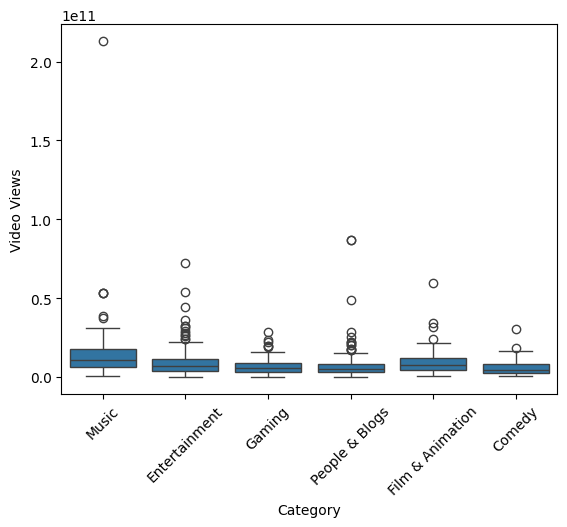

In [34]:
# box plot on category and video views, tilt bottom labels by 45 degrees
plt.xticks(rotation=45)
sns.boxplot(x='Category', y='Video Views', data=df2)

<Axes: xlabel='Category', ylabel='Video Count'>

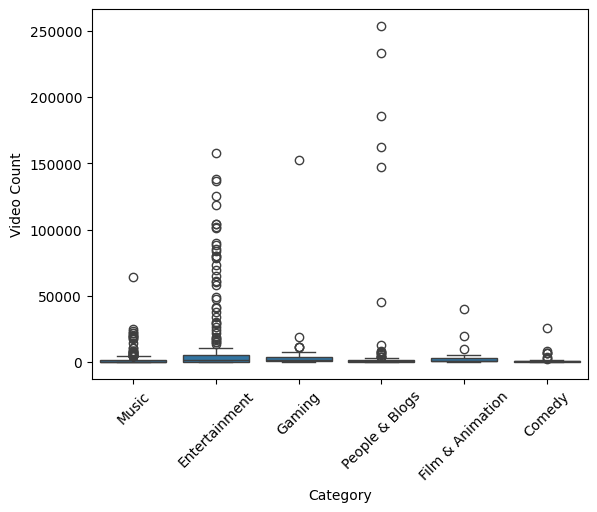

In [35]:
# box plot on category and video count, tilt bottom labels by 45 degrees
plt.xticks(rotation=45)
sns.boxplot(x='Category', y='Video Count', data=df2)

<Axes: xlabel='year_span', ylabel='Subscribers'>

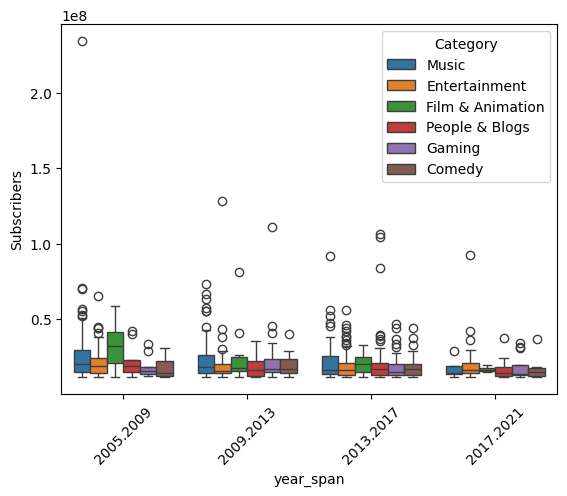

In [36]:
# box plot on year_span and subscribers, tilt bottom labels by 45 degrees
plt.xticks(rotation=45)
sns.boxplot(x='year_span', y='Subscribers', data=df2, hue='Category')

<Axes: xlabel='year_span', ylabel='Video Views'>

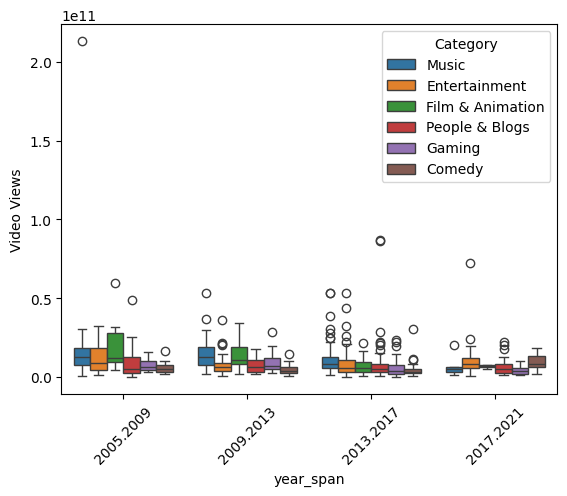

In [37]:
# box plot on year_span and video views, tilt bottom labels by 45 degrees
plt.xticks(rotation=45)
sns.boxplot(x='year_span', y='Video Views', data=df2, hue='Category')

<Axes: xlabel='year_span', ylabel='Video Count'>

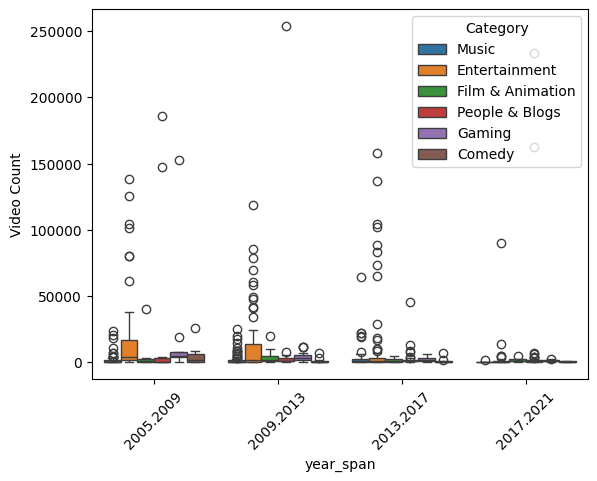

In [38]:
# box plot on year_span and video count, tilt bottom labels by 45 degrees
plt.xticks(rotation=45)
sns.boxplot(x='year_span', y='Video Count', data=df2, hue='Category')

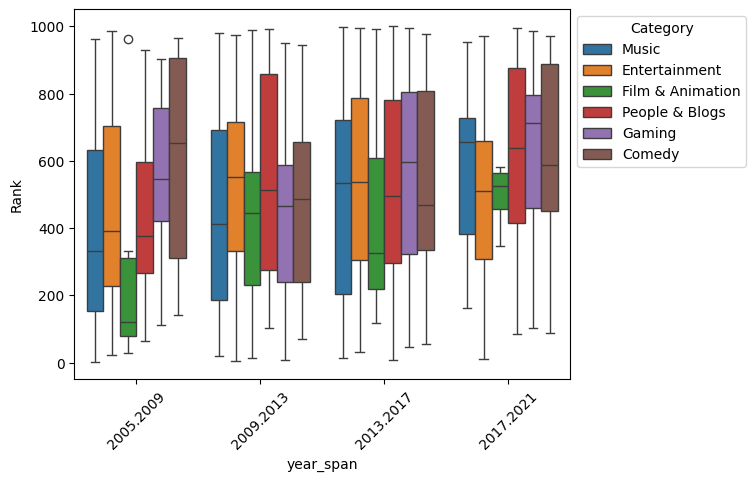

In [39]:
# box plot on year_span and rank, tilt bottom labels by 45 degrees
# also move the legend on the right side of data so it doesn't stand on top of the plot
plt.xticks(rotation=45)
ax = sns.boxplot(x='year_span', y='Rank', data=df2, hue='Category')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

<h4><b>seaborn plots - heatmaps for correlation matrices</b></h4>

<Axes: >

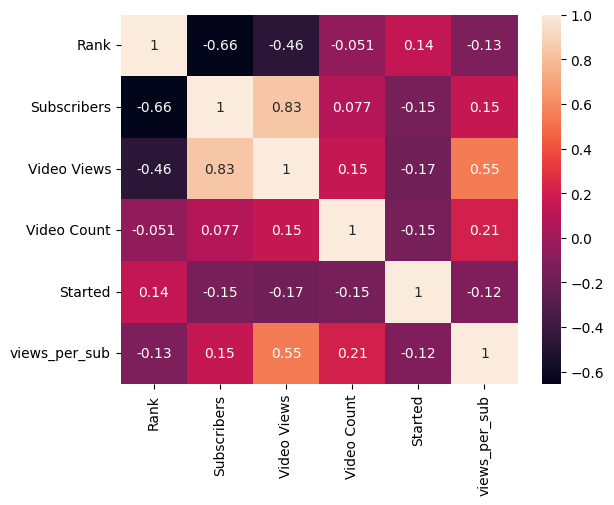

In [40]:
# basic heatmap for correlation matrix
sns.heatmap(correlations, annot=True)

<Axes: >

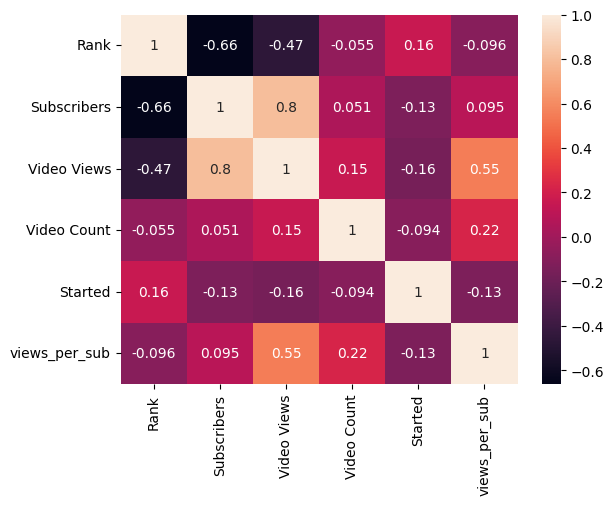

In [41]:
# basic heatmap for correlation matrix, only most popular categories
sns.heatmap(correlations2, annot=True)